In [39]:
"""
This program generates Figure 1 of "COVID Risk Narratives"
Author: Yuting Chen 
"""

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
import preprocessor as p



In [51]:
# import data
df = pd.read_csv('news_majorBF_clean.csv')
df.iloc[0,2]
df

,date,source,content,country
0,2020-01-10,"Financial Times (London, England)",\nChina's African swine fever epidemic has dra...,UK
1,2020-01-10,"Financial Times (London, England)",\nChina's African swine fever epidemic has dra...,UK
2,2020-01-10,"Financial Times (London, England)",\nChina's African swine fever epidemic has dra...,UK
3,2020-01-12,The Independent - Daily Edition,\nPuerto Rico hit by 6.0-magnitude earthquake\...,UK
4,2020-01-20,New Straits Times (Malaysia),\nTHE benchmark FTSE Bursa Malaysia KLCI (FBM ...,Malaysia
...,...,...,...,...
36018,2020-05-03,The Sunday Times (London),\nBritain will begin trade talks with America ...,UK
36019,2020-05-03,The Sunday Times (London),\nBritain will begin trade talks with America ...,UK
36020,2020-05-03,The Washington Post,\nAndrea Fuentes prepares her artistic swimmer...,US
36021,2020-05-03,Hobart Mercury (Australia),\nCORONAVIRUS restrictions are hitting illegal...,Australia


In [53]:
text = ''
for j in range(18): # slice the whole dataset to blocks for concatenation
    text_1 = ''
    start = j* 2000
    end = (j+1)*2000
    for i in range(start,end):
        if data_type ==1:
            content = df.content[i]
        else:
            content = str(df.text[i])
        text_1 = text_1 + content + ''
        if i % 100 == 0:
            print(i)
    print(j)
    text = text + text_1 + ''
print(len(text))
    
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
0
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
1
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
2
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
3
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
4
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
5
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
6
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
7
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
8
18000
18100
18

In [54]:
# pre process
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import preprocessor.api as p
porter = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def pre_process(x):
    # remove website links
    y = re.sub(r"http\S+", "", x)
    # remove multiple spaces
    y = re.sub(r'\s+', ' ', y)
    # remove multiple lines
    y = re.compile(r'\n+').sub(' ', y)  
    # Removing html tags
    y = re.compile(r'<[^>]+>').sub('', y)
    # Remove punctuations and numbers
    y = re.sub('[^a-zA-Z]', ' ', y)
    # Single character removal
    y = re.sub(r"\s+[a-zA-Z]\s+", ' ', y)
    # Removing multiple spaces
    y = re.sub(r'\s+', ' ', y)     
    # Tokenizing & Stemming words
#     y = stemSentence(y)
    # cleaning using processor for tweets
    y = p.clean(y)
    return y 
text = pre_process(text)

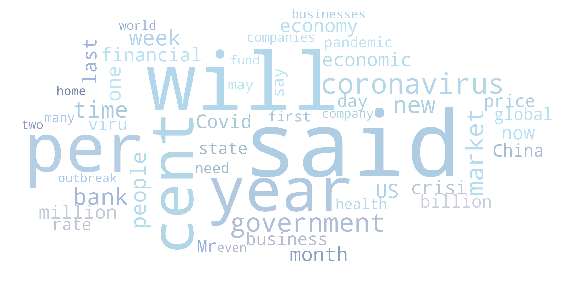

In [55]:
# generate wordcloud
from PIL import Image

char_mask = np.array(Image.open("cloud_shape.jpg"))   
    
image_colors = ImageColorGenerator(char_mask)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
#         max_font_size=40, 
        scale=3,
        mask=char_mask, 
        collocations=False,
        contour_color = 'black',
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    # to recolour the image
    plt.imshow(wordcloud.recolor(color_func=image_colors))
    plt.show()
    fig.savefig('word_cloud_news.png',bbox_inches=None)


show_wordcloud(text)
